In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
df = pd.read_csv('C:/Users/ANKUR/Desktop/iNeuron/EDA/AlgerialForestFire/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.shape
df['Region']=1
df.shape
df.loc[:121]['Region']=0
df.shape
df=df.drop(df.index[123])
df=df.drop(df.index[122])
df.shape
df = df.reset_index()

(246, 14)

(246, 15)

(246, 15)

(244, 15)

In [4]:
df.shape
df=df.drop(df.index[123])
df=df.drop(df.index[122])
df.shape
df=df.rename(columns = {'Rain ':'Rain','Classes  ': 'Classes1',' RH':'RH',' Ws':'Ws'})
df.columns
df = df.reset_index()
df['Classes1_num']=df['Classes1']

df['Classes1_num'].replace(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ','not fire     ', 'not fire    ']
                         ,[0,1,1,1,0,0,0,0],inplace=True)

(244, 16)

(242, 16)

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes1', 'Region'],
      dtype='object')

In [5]:
df.isnull().sum()
df.shape
df.dropna(inplace=True)
df.shape

df['Classes1_num']=df['Classes1_num'].astype(int)

df.isnull().sum().sum()

df.shape
df.drop(['index'],axis=1,inplace=True)
df.shape

df=df.astype({'Temperature':'int','RH':'int','Ws':'int','Rain':'float','FFMC':'float','DMC':'float',
             'DC':'float','ISI':'float','BUI':'float','FWI':'float'})

level_0         0
index           0
day             0
month           0
year            0
Temperature     0
RH              0
Ws              0
Rain            0
FFMC            0
DMC             0
DC              0
ISI             0
BUI             0
FWI             0
Classes1        1
Region          0
Classes1_num    1
dtype: int64

(242, 18)

(241, 18)

0

(241, 18)

(241, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       241 non-null    int64  
 1   day           241 non-null    object 
 2   month         241 non-null    object 
 3   year          241 non-null    object 
 4   Temperature   241 non-null    int32  
 5   RH            241 non-null    int32  
 6   Ws            241 non-null    int32  
 7   Rain          241 non-null    float64
 8   FFMC          241 non-null    float64
 9   DMC           241 non-null    float64
 10  DC            241 non-null    float64
 11  ISI           241 non-null    float64
 12  BUI           241 non-null    float64
 13  FWI           241 non-null    float64
 14  Classes1      241 non-null    object 
 15  Region        241 non-null    int64  
 16  Classes1_num  241 non-null    int32  
dtypes: float64(7), int32(4), int64(2), object(4)
memory usage: 30.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,241.0,121.311203,70.964829,0.0,60.0,120.0,183.0,243.0
Temperature,241.0,32.161826,3.640449,22.0,30.0,32.0,35.0,42.0
RH,241.0,61.958506,14.861525,21.0,52.0,63.0,74.0,90.0
Ws,241.0,15.518672,2.809334,6.0,14.0,15.0,17.0,29.0
Rain,241.0,0.749793,2.000607,0.0,0.0,0.0,0.5,16.8
FFMC,241.0,78.020332,14.274480,28.6,72.6,83.7,88.3,96.0
DMC,241.0,14.780913,12.395199,0.7,5.8,11.3,20.9,65.9
DC,241.0,49.774689,47.712892,6.9,14.7,33.4,71.0,220.4
ISI,241.0,4.776763,4.154190,0.0,1.4,3.5,7.3,19.0
BUI,241.0,16.805394,14.231143,1.1,6.1,12.5,22.9,68.0


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

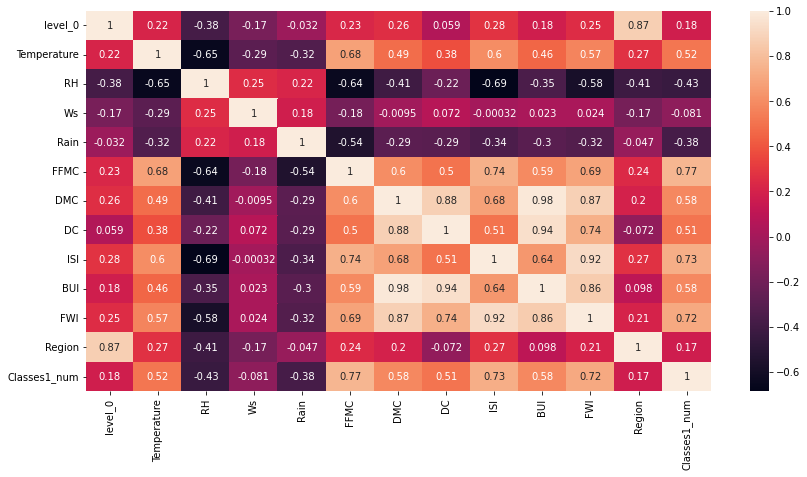

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['level_0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes1', 'Region',
       'Classes1_num'],
      dtype='object')

In [10]:
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes1,Region,Classes1_num
0,0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [11]:
print(df.shape)
df.drop(['level_0'], axis=True,inplace = True)
print(df.shape)
df=df.astype({'day':'int','month':'int','year':'int'})

(241, 17)
(241, 16)


<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

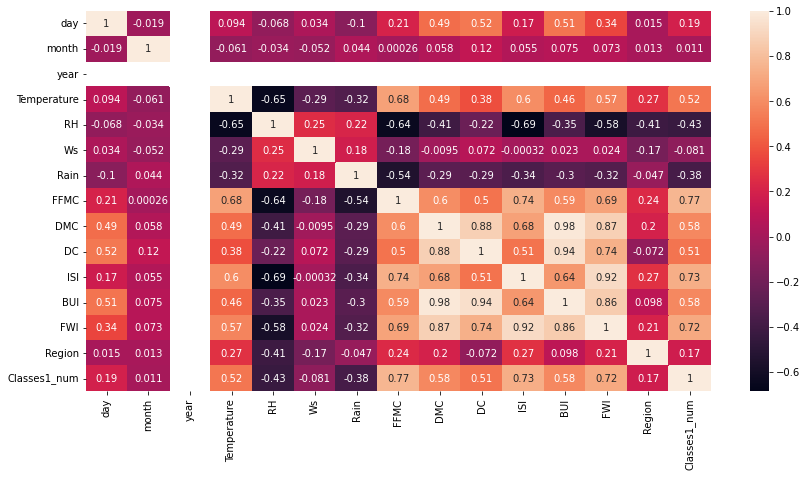

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

In [13]:
print(df.shape)
df.drop(['BUI'], axis=True,inplace = True)
print(df.shape)

(241, 16)
(241, 15)


In [21]:
X = df.drop(columns = ['Classes1_num','Classes1'])
y = df['Classes1_num']

In [22]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0


In [25]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [27]:
X_scaled

array([[-1.69777775, -1.36613125,  0.        , ..., -0.83867121,
        -0.88726251, -0.98762839],
       [-1.58367723, -1.36613125,  0.        , ..., -0.91103776,
        -0.90072196, -0.98762839],
       [-1.46957672, -1.36613125,  0.        , ..., -1.07989303,
        -0.9411003 , -0.98762839],
       ...,
       [ 1.38293608,  1.33993147,  0.        , ..., -1.05577085,
        -0.92764086,  1.01252658],
       [ 1.4970366 ,  1.33993147,  0.        , ..., -0.74218248,
        -0.86034361,  1.01252658],
       [ 1.61113711,  1.33993147,  0.        , ..., -0.86279339,
        -0.88726251,  1.01252658]])

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [29]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = log_reg.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9344262295081968

## we are getting the 93 % as accuracy

In [33]:
df_n =df.copy()

In [36]:
df_n = df_n.drop('Classes1',axis=1)

<Figure size 1584x1296 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='day'>

<AxesSubplot:>

<AxesSubplot:xlabel='month'>

<AxesSubplot:>

<AxesSubplot:xlabel='year'>

<AxesSubplot:>

<AxesSubplot:xlabel='Temperature'>

<AxesSubplot:>

<AxesSubplot:xlabel='RH'>

<AxesSubplot:>

<AxesSubplot:xlabel='Ws'>

<AxesSubplot:>

<AxesSubplot:xlabel='Rain'>

<AxesSubplot:>

<AxesSubplot:xlabel='FFMC'>

<AxesSubplot:>

<AxesSubplot:xlabel='DMC'>

<AxesSubplot:>

<AxesSubplot:xlabel='DC'>

<AxesSubplot:>

<AxesSubplot:xlabel='ISI'>

<AxesSubplot:>

<AxesSubplot:xlabel='FWI'>

<AxesSubplot:>

<AxesSubplot:xlabel='Region'>

<AxesSubplot:>

<AxesSubplot:xlabel='Classes1_num'>

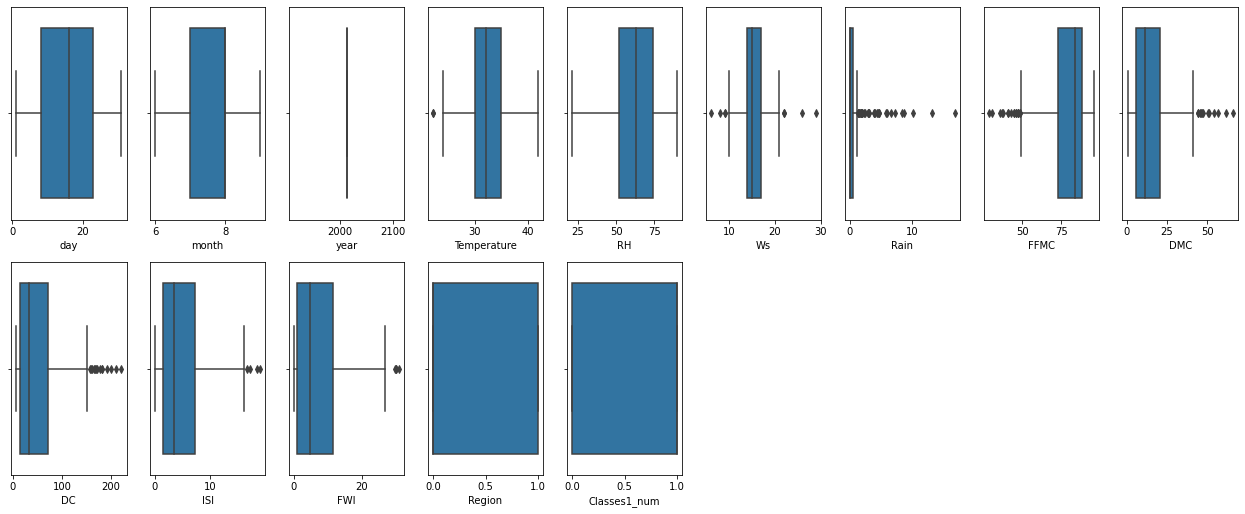

In [38]:
plt.figure(figsize=(22,18))
for i,col in enumerate(df_n.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(df_n[col])

# Z score method

In [39]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [40]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [41]:
replace_with_thresholds(df_n, df_n.columns)

<Figure size 1584x1296 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='day'>

<AxesSubplot:>

<AxesSubplot:xlabel='month'>

<AxesSubplot:>

<AxesSubplot:xlabel='year'>

<AxesSubplot:>

<AxesSubplot:xlabel='Temperature'>

<AxesSubplot:>

<AxesSubplot:xlabel='RH'>

<AxesSubplot:>

<AxesSubplot:xlabel='Ws'>

<AxesSubplot:>

<AxesSubplot:xlabel='Rain'>

<AxesSubplot:>

<AxesSubplot:xlabel='FFMC'>

<AxesSubplot:>

<AxesSubplot:xlabel='DMC'>

<AxesSubplot:>

<AxesSubplot:xlabel='DC'>

<AxesSubplot:>

<AxesSubplot:xlabel='ISI'>

<AxesSubplot:>

<AxesSubplot:xlabel='FWI'>

<AxesSubplot:>

<AxesSubplot:xlabel='Region'>

<AxesSubplot:>

<AxesSubplot:xlabel='Classes1_num'>

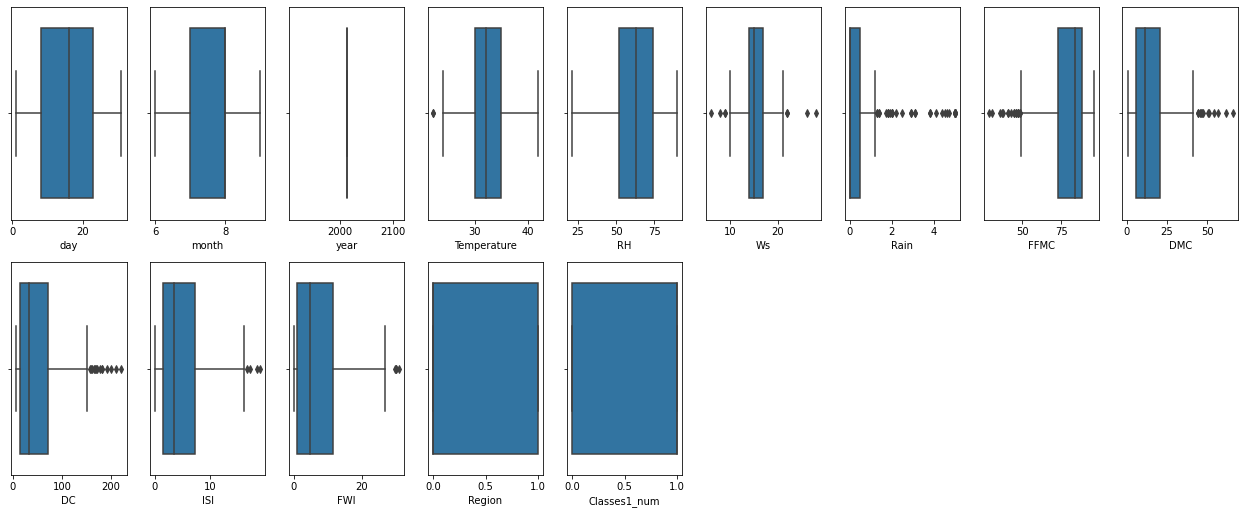

In [42]:
plt.figure(figsize=(22,18))
for i,col in enumerate(df_n.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(df_n[col])

# No change with the Z score method

In [43]:
df1 = df_n.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [45]:
remove_outliers_IQR('Rain')

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


In [44]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'FWI', 'Region', 'Classes1_num'],
      dtype='object')

In [47]:
def create_comparison_plot(df_n,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df_n[column])

    plt.subplot(2,2,2)
    sns.boxplot(df_n[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

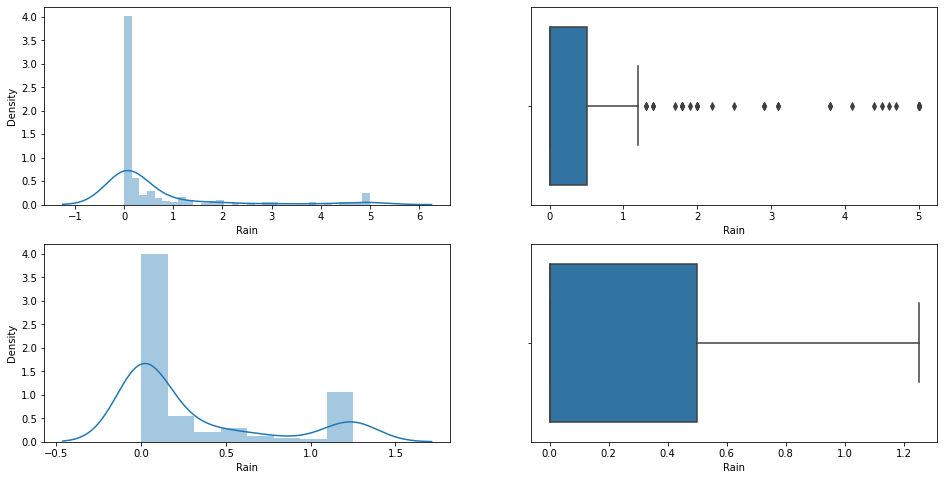

In [48]:
create_comparison_plot(df_n,df1,"Rain")

percentile25 72.6
percentile75 88.3
Upper limit 111.85
Lower limit 49.04999999999999


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


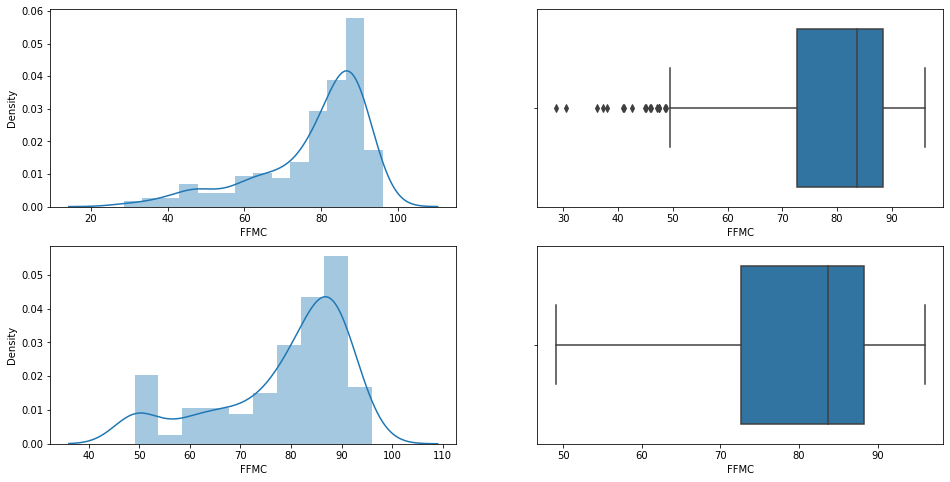

In [49]:
remove_outliers_IQR('FFMC')
create_comparison_plot(df_n,df1,"FFMC")

percentile25 5.8
percentile75 20.9
Upper limit 43.55
Lower limit -16.849999999999998


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


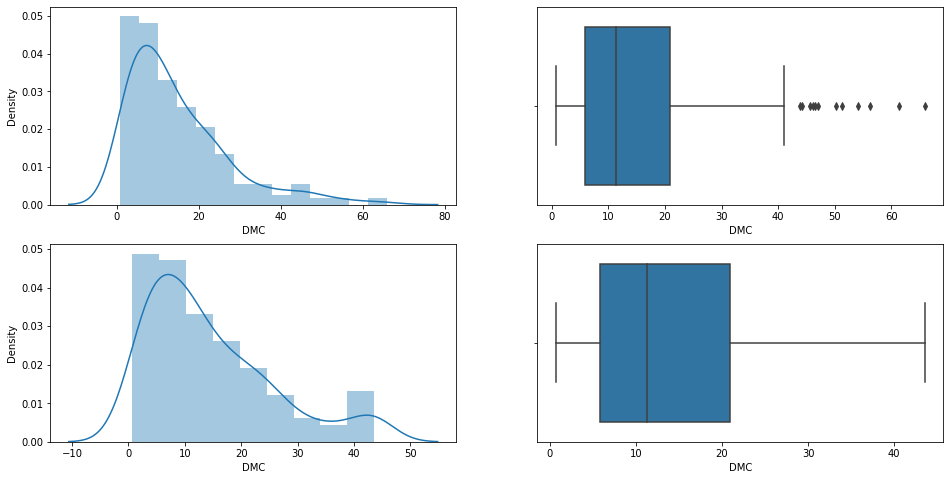

In [50]:
remove_outliers_IQR('DMC')
create_comparison_plot(df_n,df1,"DMC")

percentile25 14.7
percentile75 71.0
Upper limit 155.45
Lower limit -69.74999999999999


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


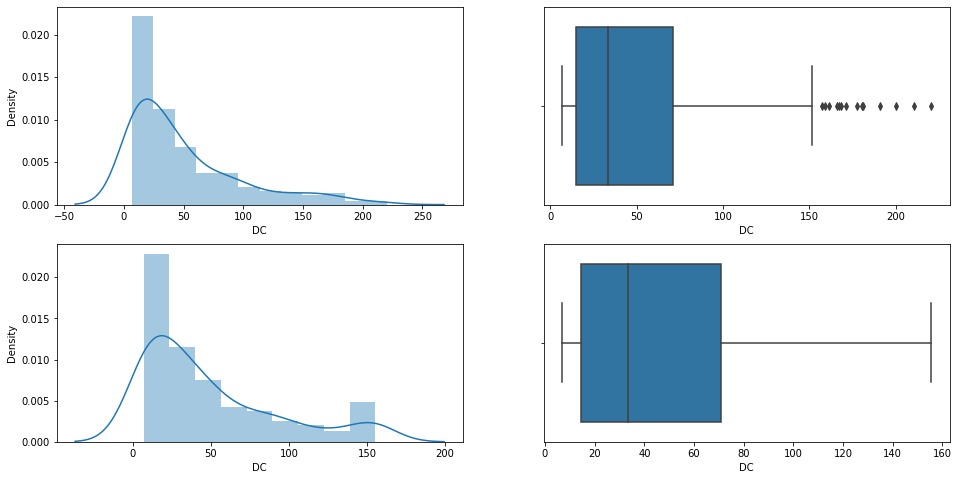

In [51]:
remove_outliers_IQR('DC')
create_comparison_plot(df_n,df1,"DC")

percentile25 1.4
percentile75 7.3
Upper limit 16.150000000000002
Lower limit -7.450000000000001


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


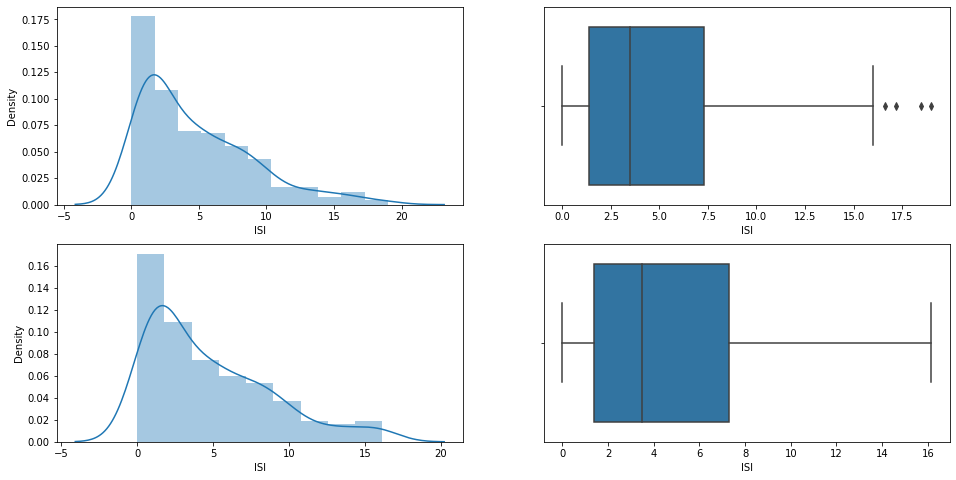

percentile25 0.8
percentile75 11.6
Upper limit 27.799999999999997
Lower limit -15.399999999999999


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


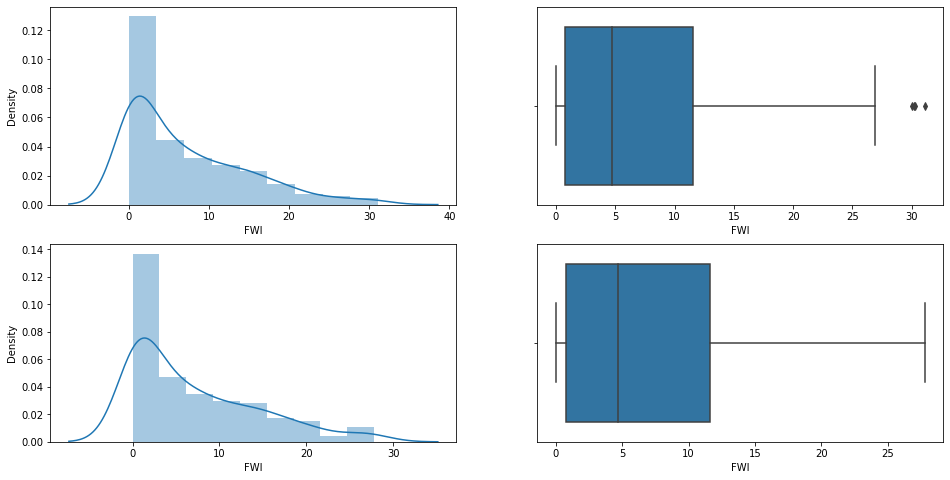

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


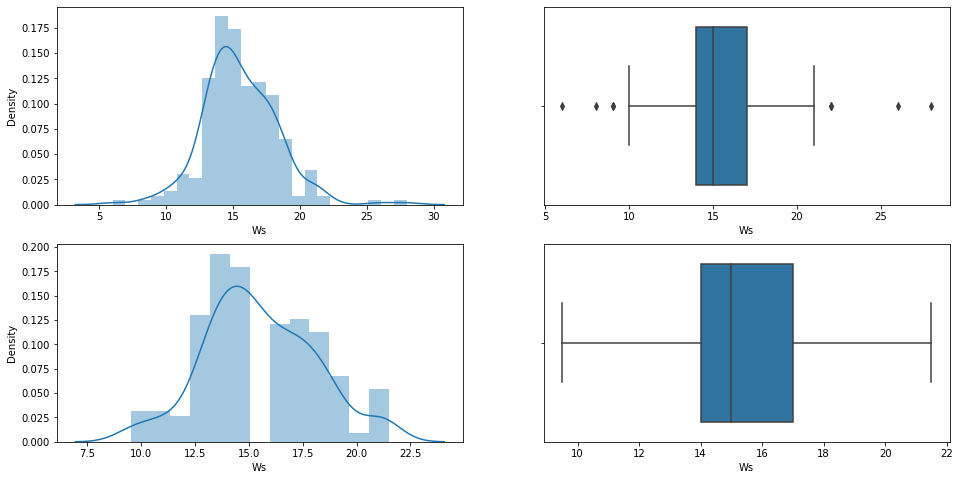

percentile25 30.0
percentile75 35.0
Upper limit 42.5
Lower limit 22.5


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region,Classes1_num


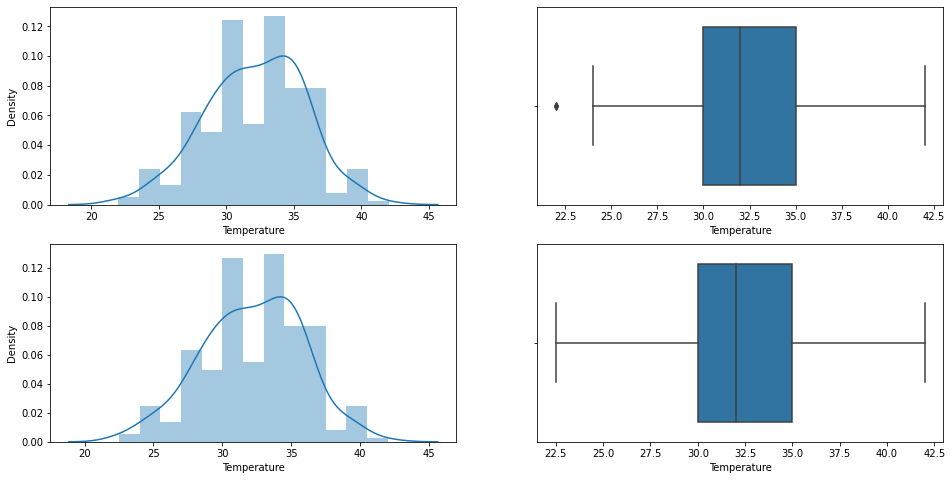

In [53]:
remove_outliers_IQR('ISI')
create_comparison_plot(df_n,df1,"ISI")

remove_outliers_IQR('FWI')
create_comparison_plot(df_n,df1,"FWI")

remove_outliers_IQR('Ws')
create_comparison_plot(df_n,df1,"Ws")

remove_outliers_IQR('Temperature')
create_comparison_plot(df_n,df1,"Temperature")

In [52]:
df_n.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'FWI', 'Region', 'Classes1_num'],
      dtype='object')

In [55]:
X = df_n.drop(columns = ['Classes1_num'])
y = df_n['Classes1_num']

In [56]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [58]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9344262295081968

# After removing outlier also i am getting the 93.44 accuracy